# Assignment 3
**Aana Kakroo**

#### Task: Build a CNN model for Bird species

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# import the required libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential

In [8]:
# unzipping the zip file containing image dataset
!unzip '/content/drive/MyDrive/Colab Notebooks/Aana Kakroo Externship Assignments/bird_classification.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/Aana Kakroo Externship Assignments/bird_classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating:

##### Data Augmentation

In [9]:
# import required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_gen = ImageDataGenerator(
    rescale=(1./255), # (0 to 255) convert to (0 to 1)
    #rotation_range=20,  # Rotate images randomly up to 20 degrees
    #width_shift_range=0.2,  # Shift images horizontally by a fraction of total width
    #height_shift_range=0.2,  # Shift images vertically by a fraction of total height
    shear_range=0.2,  # Shear transformations
    #zoom_range=0.2,  # Randomly zoom in/out on images
    horizontal_flip=True,  # Randomly flip images horizontally
)
test_gen = ImageDataGenerator(rescale=(1./255))  

In [11]:
train = train_gen.flow_from_directory('/content/test_data/test_data',
                                      target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/train_data/train_data',
                                    target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)

Found 157 images belonging to 16 classes.
Found 150 images belonging to 16 classes.


In [12]:
# getting indices of class names
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

##### CNN model

In [13]:
# importing the required libraries
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

In [14]:
# Initializing the sequential model
model = Sequential()
# Adding convolutional layer with input
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(120, 120, 3)))
# Normalizing the convolutional layer output
model.add(BatchNormalization())
# Selecting the maximum values
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropping the unwanted 20% of data
model.add(Dropout(0.2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
# Hidden layers
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
# Output layer
model.add(Dense(16,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 118, 118, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 59, 59, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 57, 57, 64)       2

In [16]:
# compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

##### Early stopping

In [17]:
# import required libraries
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor='accuracy',patience=8)

In [19]:
# fit the model and use early stopping
history = model.fit(train,batch_size=8,validation_data=test,epochs=50,callbacks=early_stop)

Epoch 1/50
20/20 [==============================] - 156s 8s/step - loss: 2.7916 - accuracy: 0.1083 - val_loss: 2.7837 - val_accuracy: 0.0667
Epoch 2/50
20/20 [==============================] - 126s 6s/step - loss: 2.5275 - accuracy: 0.2229 - val_loss: 3.5071 - val_accuracy: 0.0600
Epoch 3/50
20/20 [==============================] - 126s 6s/step - loss: 2.4130 - accuracy: 0.2229 - val_loss: 4.2286 - val_accuracy: 0.0600
Epoch 4/50
20/20 [==============================] - 116s 6s/step - loss: 2.2397 - accuracy: 0.3057 - val_loss: 3.8313 - val_accuracy: 0.0600
Epoch 5/50
20/20 [==============================] - 161s 8s/step - loss: 2.2754 - accuracy: 0.3312 - val_loss: 4.5200 - val_accuracy: 0.0600
Epoch 6/50
20/20 [==============================] - 162s 8s/step - loss: 2.2309 - accuracy: 0.2994 - val_loss: 4.2093 - val_accuracy: 0.1000
Epoch 7/50
20/20 [==============================] - 112s 6s/step - loss: 2.1600 - accuracy: 0.3376 - val_loss: 4.4720 - val_accuracy: 0.0600
Epoch 8/50
20

##### Plotting accuracy and loss

In [20]:
# import the required libraries
import matplotlib.pyplot as plt

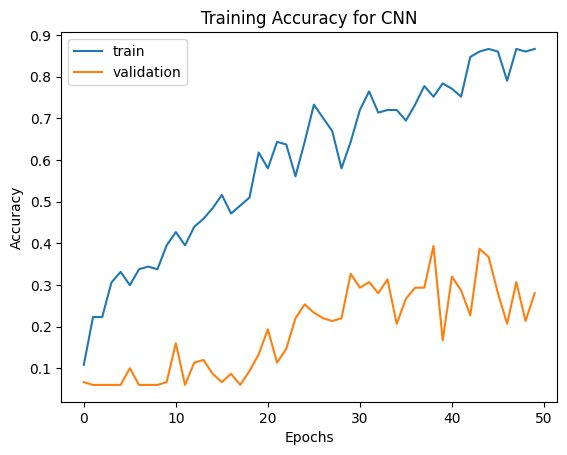

In [21]:
# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy for CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

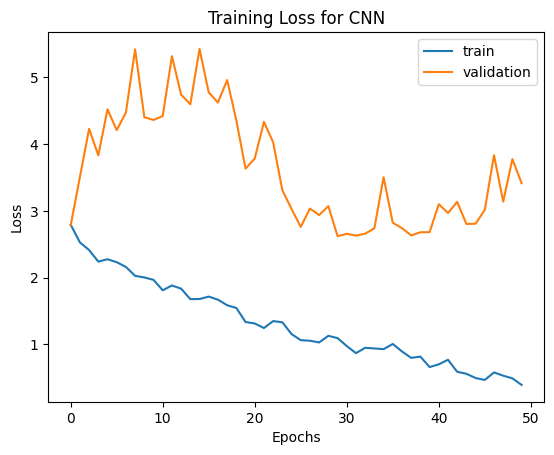

In [22]:
# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss for CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

##### Testing

In [23]:
# importing required libraries
from tensorflow.keras.preprocessing import image

# testing on random image
img = image.load_img('/content/test_data/test_data/lbicrw/100_4917.JPG',target_size=(120,120))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
pred = np.argmax(model.predict(img))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 474ms/step
12
lbicrw


In [26]:
# testing on another random image
img1 = image.load_img('/content/test_data/test_data/blasti/DSC_6399.jpg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred1 = np.argmax(model.predict(img1))
print(pred1)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred1])

1/1 [==============================] - 0s 36ms/step
12
lbicrw


#### Image classification of bird species using transfer learning (using ResNet 50)

##### ResNet50 model

In [27]:
# import required libraries
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

In [28]:
# initialise ResNet50 model with input shape
resnet = ResNet50(include_top=False,input_shape=(120,120,3))

94765736/94765736 [==============================] - 1s 0us/step


In [29]:
# keeping the same weights as when trained on imagenet
for layer in resnet.layers:
  layer.trainable=False

In [30]:
# adding flatten layer and an output dense layer to the ResNet50 model
flatten_layer = Flatten()(resnet.output)
output_layer = Dense(16, activation='softmax')(flatten_layer)
resnet_model = Model(inputs=resnet.input,outputs=output_layer)

In [31]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 126, 126, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 60, 60, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 60, 60, 64)   256         ['conv1_conv[0][0]']         

In [32]:
# compiling the model
resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
# fitting the model on data
resnet_history = resnet_model.fit(train,epochs=30,validation_data=test,callbacks=early_stop)

Epoch 1/30
20/20 [==============================] - 159s 8s/step - loss: 3.7858 - accuracy: 0.0764 - val_loss: 2.9922 - val_accuracy: 0.1600
Epoch 2/30
20/20 [==============================] - 149s 8s/step - loss: 2.8401 - accuracy: 0.1401 - val_loss: 2.7633 - val_accuracy: 0.2133
Epoch 3/30
20/20 [==============================] - 151s 8s/step - loss: 2.7494 - accuracy: 0.1656 - val_loss: 2.8834 - val_accuracy: 0.0800
Epoch 4/30
20/20 [==============================] - 118s 6s/step - loss: 2.5638 - accuracy: 0.2166 - val_loss: 2.8416 - val_accuracy: 0.1267
Epoch 5/30
20/20 [==============================] - 119s 6s/step - loss: 2.6293 - accuracy: 0.1975 - val_loss: 2.6238 - val_accuracy: 0.1600
Epoch 6/30
20/20 [==============================] - 119s 6s/step - loss: 2.6223 - accuracy: 0.2102 - val_loss: 2.6432 - val_accuracy: 0.2267
Epoch 7/30
20/20 [==============================] - 150s 8s/step - loss: 2.3897 - accuracy: 0.2166 - val_loss: 2.6318 - val_accuracy: 0.2333
Epoch 8/30
20

##### Plotting accuracy and loss

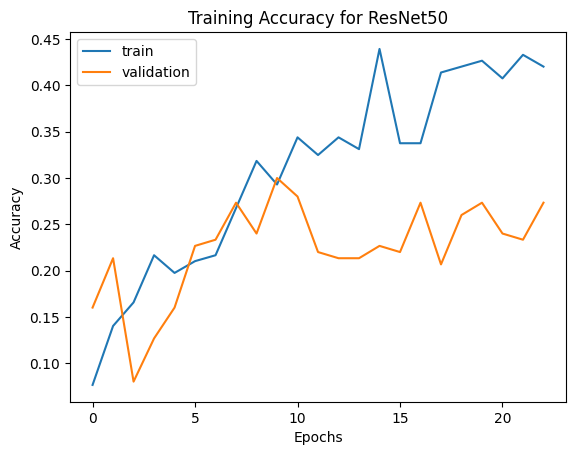

In [34]:
# Plot training accuracy
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('Training Accuracy for ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

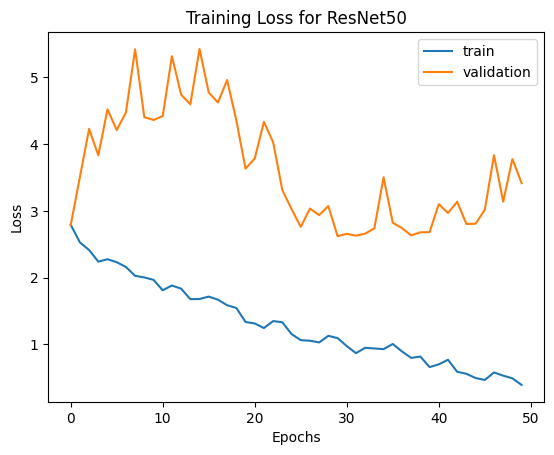

In [35]:
# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss for ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

##### Testing

In [36]:
# testing on random image
img = image.load_img('/content/test_data/test_data/cbrtsh/_D32_10313.jpg',target_size=(120,120))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
pred = np.argmax(resnet_model.predict(img))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 1s 1s/step
3
cbrtsh


In [38]:
# testing on another random image
img = image.load_img('/content/test_data/test_data/rebimg/100_5758.JPG',target_size=(120,120))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
pred = np.argmax(resnet_model.predict(img))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 207ms/step
7
himbul


In [39]:
# testing on another random image
img = image.load_img('/content/test_data/test_data/jglowl/_D32_13515.jpg',target_size=(120,120))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
pred = np.argmax(resnet_model.predict(img))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 110ms/step
4
cmnmyn
